
<a id='lqc'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Problemas de Programação Dinâmica Quadrática e Linear (QL)


<a id='index-0'></a>

## Conteúdo

- [Problemas de Programação Dinâmica Quadrática e Linear (QL)](#Problemas-de-Programação-Dinâmica-Quadrática-e-Linear-(QL))  
  - [Resumo](#Resumo)  
  - [Introdução](#Introdução)  
  - [Opmtimalidade – Horizontes Finitos](#Optimalidade-–-Horizontes-Finitos)  
  - [Implementação](#Implementação)  
  - [Extensões e Comentários](#Extensões-e-Comentários)  
  - [Outras Aplicações](#Outras-Aplicações)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Controle quadrático linear (QL) se refere à uma classe de problemas de otimização dinâmica que tem encontrado aplicações em quase todo campo científico.

Essa aula provê uma introdução ao controle QL e suas aplicações na Economia.

Como nós vamos ver, sistemas QL tem uma simples estrutura que faz deles um excelente instrumento de trabalho para uma larga variedade de problemas econômicos.

Além disso, enquanto a estrutura quadrática e linear for restrita, ela é de fato bem mais flexível do que aparenta inicialmente ser.

Esses temas aparecem abaixo repetitidamente:

Matematicamente, problemas de controle QL são proximamente relatados pelo [Filtro de Kalman](https://julia.quantecon.org/../tools_and_techniques/kalman.html).

- Formulações recursivas de problemas de controle linear-quadrático e problemas de filtragem de Kalman envolvem matrizes de **Equações de Riccati**.
- Formulações clássicas de problemas de controle linear e filtragem linear fazem uso de decomposições matriciais semelhantes ao exemplo [desta aula](https://julia.quantecon.org/../time_series_models/lu_tricks.html), e [também desta](https://julia.quantecon.org/../time_series_models/classical_filtering.html)).  


Lendo o que se segue, será útil ter alguma familiaridade com:

- Manipulações de matrizes.
- Vetores de variáveis aleatórias.
- Programação dinâmica e a Equação de Bellman (veja por exemplo [essa aula](https://julia.quantecon.org/short_path.html) e [essa](https://julia.quantecon.org/optgrowth.html)).  


Para leituras adicionais em controle QL, veja:

- [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012), capítulo 5;  
- [[HS08]](https://julia.quantecon.org/../zreferences.html#hansensargent2008), capítulo 4, e  
- [[HLL96]](https://julia.quantecon.org/../zreferences.html#hernandezlermalasserre1996), seção 3.5.  


De maneira a focar na computação, nós deixamos as provas longas para esses recursos (enquanto tentamos provar com o máximo de intuição possível).

## Introdução

A parte “linear” de QL é uma lei de moção linear para o estado, enquanto as partes “quadráticas” se referem às preferências.

Vamos começar com o primeiro, passando para o último, e então juntando em um problema de otimização.

### A Lei de Moção

Seja $ x_t $ um vetor descrevendo o estado de algum sistema econômico.

Suponha que $ x_t $ segue uma lei de moção linear dada por:


<a id='equation-lq-lom'></a>
$$
x_{t+1} = A x_t + B u_t + C w_{t+1},
\qquad t = 0, 1, 2, \ldots \tag{1}
$$

Aqui:

- $ u_t $ é um vetor de "controle", incorporando opções disponíveis para um tomador de decisão que confronta o estado atual $ x_t $.
- $ \{w_t\} $ é um processo de choque com médio zero não correlacionado que satisfaz $ \mathbb E w_t w_t'= I $, em que o lado direito é a matriz de identidade.

Considerando as dimensões:

- $ x_t $ é $ n \times 1 $, $ A $ é $ n \times n $  
- $ u_t $ é $ k \times 1 $, $ B $ é $ n \times k $  
- $ w_t $ é $ j \times 1 $, $ C $ é $ n \times j $  

#### Exemplo 1

Considere uma restrição orçamentária familiar dada por:

$$
a_{t+1} + c_t = (1 + r) a_t + y_t
$$

Aqui $ a_t $ são ativos, $ r $ é uma taxa de juros fixa, $ c_t $ é o consumo presente, e $ y_t $ é a renda atual não-financeira.

Se nós supormos que $ \{ y_t \} $ é seriamente não-correlata e $ N(0, \sigma^2) $, então, tomando $ \{ w_t \} $ como uma normal padrão, podemos reescrever o sistema como:

$$
a_{t+1} = (1 + r) a_t - c_t + \sigma w_{t+1}
$$

Isso é claramente um caso especial de [(1)](#equation-lq-lom), com os ativos como variáveis de estado e o consumo como variável de controle.


<a id='lq-hhp'></a>

#### Exemplo 2

Uma característica irrealista do modelo prévio é que a renda não-financeira tem média zero e é consequentemente negativa.

Isso pode ser facilmente superado pela adição de uma média suficientemente larga.

Portanto, nesse exemplo nós tomamos $ y_t = \sigma w_{t+1} + \mu $ para algum número rel positivo $ \mu $.

Outra alteração que é útil introduzir (veremos em breve) é alterar a variável de controle de consumo para o desvio de consumo de uma quantidade "ideal" de $ \bar c $.

(a maioria das parametrizações serão tais que $ \bar c $ sejam grandes em relação à quantidade de consumo atingível em cada período e, portanto, a família deseja aumentar o consumo).

Por essa razão, agora temos o controle para $ u_t := c_t - \bar c $.

Em termos dessas variáveis, a restrição orçamentária $ a_{t+1} = (1 + r) a_t - c_t + y_t $ se torna:


<a id='equation-lq-lomwc'></a>
$$
a_{t+1} = (1 + r) a_t - u_t - \bar c + \sigma w_{t+1} + \mu \tag{2}
$$

Como poderemos escrever esse novo sistema no formato da equação [(1)](#equation-lq-lom)?

Se, como no exemplo passado, nós tomarmos $ a_t $ como variável de estado, então chegamos à um problema: a lei de oção contém alguns termos constantes no seu lado direito.

Isso significa que estamos lidando com uma função *afim*, não linear (lembre-se [desta discussão](https://julia.quantecon.org/../tools_and_techniques/linear_algebra.html#la-linear-map)).

Felizmente, nós podemos contornar esse problema adicionando outra variável de estado.

Em particular, se nós escrevermos:


<a id='equation-lq-lowmc'></a>
$$
\left(
\begin{array}{c}
a_{t+1} \\
1
\end{array}
\right) =
\left(
\begin{array}{cc}
1 + r & -\bar c + \mu \\
0     & 1
\end{array}
\right)
\left(
\begin{array}{c}
a_t \\
1
\end{array}
\right) +
\left(
\begin{array}{c}    -1 \\
0
\end{array}
\right)
u_t +
\left(
\begin{array}{c}
\sigma \\
0
\end{array}
\right)
w_{t+1} \tag{3}
$$

então a primeira linha será equivalente a [(2)](#equation-lq-lomwc).

Além disso, o modelo agora é linear, e pode ser escrito na forma de [(1)](#equation-lq-lom) fazendo:


<a id='equation-lq-lowmc2'></a>
$$
x_t :=
\left(
\begin{array}{c}
a_t \\
1
\end{array}
\right),
\quad
A :=
\left(
\begin{array}{cc}
1 + r & -\bar c + \mu \\
0     & 1
\end{array}
\right),
\quad
B :=
\left(
\begin{array}{c}
-1 \\
0
\end{array}
\right),
\quad
C :=
\left(
\begin{array}{c}
\sigma \\
0
\end{array}
\right) \tag{4}
$$

Com efeito, nós obtivemos por si próprios a lineariade pela adição de outra variável de estado.

### Preferências

No modelo QL, o objetivo é minimizar um fluxo de perdas,onde o tempo-$ t $ perdido é dado pela expressão quadrática


<a id='equation-lq-pref-flow'></a>
$$
x_t' R x_t + u_t' Q u_t \tag{5}
$$

Aqui

- $ R $ assume-se como sendo $ n \times n $, simétrica e definida não-negativa; e  
- $ Q $ assume-se como sendo $ k \times k $, simétrica e positiva definida.  


>**Observação**
>
> De fato, para muitos problemas econômicos, as condições de definição em $ R $ e $ Q $ podem ser relaxadas. É suficiente que certas submatrizes de $ R $ e $ Q $ sejam definidas não-negativas. Veja [[HS08]](https://julia.quantecon.org/../zreferences.html#hansensargent2008) para obter detalhes.

#### Exemplo 1

Um exemplo muito simples que satisfaz essas assumpções é tomar $ R $ e $ Q $ como matrizes-identidade, tal que as perdas atuais sejam

$$
x_t' I x_t + u_t' I u_t = \| x_t \|^2 + \| u_t \|^2
$$

Assim, para ambas as variáveis de estado e controle, a perda é mensurada como o quadrado da distância da origem.

(de fato, o caso geral [(5)](#equation-lq-pref-flow) pode ser entendido também desse modo, mas com $ R $ e $ Q $ identificando outras noções – não-Euclidianas – de “distância” do vetor nulo).

Intuitivamente, nós podemos frequentemente achar o estado $ x_t $ como um desvio representado por um alvo, tal como:

- Desvio da inflação de algum nível meta; ou
- Desvio do capital social de uma empresa de uma quantidade desejada.


O alvo é por o estado próximo ao alvo, enquanto se usa parcimoniosamente controles.

#### Exemplo 2

No problema das famílias [estudado acima](#lq-hhp), configurando $ R=0 $ e $ Q=1 $ produz preferências:

$$
x_t' R x_t + u_t' Q u_t = u_t^2 = (c_t - \bar c)^2
$$

Sob essa especificação, a perda atual da família é o desvio quadrado do consumo do nível ideal $ \bar c $.

## Optimalidade – Horizontes Finitos


<a id='index-1'></a>
Vamos agora ser precisos sobre o problema de otimização que nós queremos considerar, e procurar saber como resolvê-lo.

### O objetivo

Nós iremos iniciar com o caso de horizontes finitos, com o tempo terminal $ T \in \mathbb N $.

Nesse caso, o alvo é escolher uma sequência de controles $ \{u_0, \ldots, u_{T-1}\} $ para minimizar o objetivo.


<a id='equation-lq-object'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{T-1} \beta^t (x_t' R x_t + u_t' Q u_t) + \beta^T x_T' R_f x_T
\right\} \tag{6}
$$

sujeito à lei da moção [(1)](#equation-lq-lom) e estado inicial $ x_0 $.

Os novos objetos introduzidos aqui sãp $ \beta $ e a matriz $ R_f $.

O escalar $ \beta $ é o fator de desconto, enquanto $ x' R_f x $ dá a perda terminal associada com o estado $ x $.

Comentários:

- Assumimos que $ R_f $ seja $ n \times n $, definida simétrico e não negativo;
- Permitimos $ \beta = 1 $ e, portanto, incluímos o caso não descontado, e
- $ x_0 $ pode ser aleatório; nesse caso, exigimos que seja independente da sequência de choque $ w_1, \ldots, w_T $



<a id='lq-cp'></a>

### Informação

Há uma restrição que deixamos de mencionar até agora: o tomador de decisão que resolve esse problema de QL conhece apenas o presente e o passado, não o futuro.

Para esclarecer esse ponto, considere a sequência de controles $ \{u_0, \ldots, u_ {T-1}\} $.

Ao escolher esses controles, o tomador de decisão pode levar em consideração os efeitos dos choques
$ \{w_1, \ldots, w_T \} $ no sistema.

No entanto, normalmente é assumido - e será assumido aqui - que o tempo - $ t $ controle $ u_t $ pode ser feito apenas com conhecimento de choques passados e presentes.

A maneira sofisticada-[teórica](https://en.wikipedia.org/wiki/Measure_%28mathematics%29) de dizer isso é que $ u_t $ deve ser mensurável em relação à álgebra $ \sigma $ gerada por $ x_0, w_1, w_2,
\ldots, sem $.

Isso é um fato equivalente a indicar que $ u_t $ pode ser escrito no formato $ u_t = g_t(x_0, w_1, w_2, \ldots, w_t) $ para alguma função mensurável de Borel $ g_t $.

(praticamente todas as funções úteis para aplicativos são mensuráveis pelo Borel, portanto, para fins de intuição, você pode ler a última frase como "para alguma função $ g_t $").

Agora observe que $ x_t $ dependerá das realizações de $ x_0, w_1, w_2, \ldots, w_t $.

De fato, $ x_t $ resume todas as informações sobre esses choques históricos que o tomador de decisão precisa definir de maneira otimizada os controles.

Mais precisamente, pode ser demonstrado que qualquer controle ideal $ u_t $ sempre pode ser gravado como uma função apenas do estado atual.

Portanto, a seguir, restringimos a atenção às políticas de controle (ou seja, funções) no formato $ u_t = g_t(x_t) $.

Na verdade, a discussão anterior se aplica a todos os problemas de programação dinâmica padrão.

O que há de especial no caso QL é que - como veremos em breve - o $ u_t $ ideal acaba sendo uma função linear de $ x_t $.

### Solução

Para resolver o problema de QL do horizonte finito, podemos usar uma estratégia de programação dinâmica baseada em indução reversa que é conceitualmente semelhante à abordagem adotada [nesta aula](https://julia.quantecon.org/short_path.html).

Por razões que em breve ficarão claras, introduzimos primeiro a notação $ J_T(x) = x'R_f x $.

Agora considere o problema do tomador de decisão no penúltimo período.

Em particular, deixe o tempo ser $ T-1 $ e suponha que o estado é $ x_{T-1} $.

O tomador de decisão deve compensar as perdas atuais e (descontadas) finais e, portanto,
resolve:

$$
\min_u \{
x_{T-1}' R x_{T-1} + u' Q u + \beta \,
\mathbb E J_T(A x_{T-1} + B u + C w_T)
\}
$$

Nesse estágio, é conveniente definir a função:


<a id='equation-lq-lsm'></a>
$$
J_{T-1} (x) =
\min_u \{
x' R x + u' Q u + \beta \,
\mathbb E J_T(A x + B u + C w_T)
\} \tag{7}
$$

A função $ J_{T-1} $ será chamada de função de valor $ T-1 $, e $ J_{T-1}(x) $ pode ser considerado como representando o total de "perda a percorrer" do estado $ x $ no momento $ T-1 $ quando o tomador de decisão se comporta de maneira ideal.

Agora vamos voltar para $ T-2 $.

Para um tomador de decisão em $ T-2 $, o valor $ J_{T-1}(x) $ desempenha um papel análogo ao desempenhado pela perda terminal $ J_T(x) = x'R_f x $ para o tomador de decisão a $ T-1 $.

Ou seja, $ J_{T-1}(x) $ resume a perda futura associada à mudança para o estado $ x $.

O tomador de decisão escolhe seu controle $ u $ para compensar a perda atual contra a perda futura, onde:

- O próximo período é $ x_{T-1} = Ax_{T-2} + Bu + C w_{T-1} $ e, portanto, depende da escolha do controle atual, e
- O "custo" do desembarque no estado $ x_{T-1} $ é $ J_{T-1}9(x_{T-1}) $.


Assim, o problema da perda é dado por:

$$
\min_u
\{
x_{T-2}' R x_{T-2} + u' Q u + \beta \,
\mathbb E J_{T-1}(Ax_{T-2} + B u + C w_{T-1})
\}
$$

Sendo,

$$
J_{T-2} (x)
= \min_u
\{
x' R x + u' Q u + \beta \,
\mathbb E J_{T-1}(Ax + B u + C w_{T-1})
\}
$$

o padrão para indução reversa agora está claro.

Particularmente, nós definimos uma sequência de funções-valor como $ \{J_0, \ldots, J_T\} $ via:

$$
J_{t-1} (x)
= \min_u
\{
x' R x + u' Q u + \beta \,
\mathbb E J_{t}(Ax + B u + C w_t)
\}
\quad \text{e} \quad
J_T(x) = x' R_f x
$$

A primeira igualdade é a equação de Bellman, da teoria da programação dinâmica especializada ao problema QL do horizonte finito.

Agora que temos $ \{J_0, \ldots, J_T \} $, podemos obter os controles ideais.

Como primeiro passo, vamos descobrir como são as funções de valor.

Acontece que todo $ J_t $ tem o formato $ J_t(x) = x'P_t x + d_t $ onde $ P_t $ é uma matriz $ n \times n $ e $ d_t $ é uma constante.

Podemos mostrar isso por indução, começando em $ P_T: = R_f $ e $ d_T = 0 $.

Usando esta notação, [(7)](#equation-lq-lsm) torna-se:


<a id='equation-lq-fswb'></a>
$$
J_{T-1} (x) =
\min_u \{
x' R x + u' Q u + \beta \,
\mathbb E (A x + B u + C w_T)' P_T (A x + B u + C w_T)
\} \tag{8}
$$

Para obter o minimizador, podemos usar a derivada do r.h.s. em relação a $ u $ e defina-o como zero.

Aplicando as regras relevantes de [cálculo matricial](https://julia.quantecon.org/../tools_and_techniques/linear_algebra.html#la-mcalc), podemos obter:


<a id='equation-lq-oc0'></a>
$$
u  = - (Q + \beta B' P_T B)^{-1} \beta B' P_T A x \tag{9}
$$

Conectando novamente [(8)](#equation-lq-fswb) e rearranjando os rendimentos:

$$
J_{T-1} (x) = x' P_{T-1} x + d_{T-1}
$$

onde:

<a id='equation-lq-finr'></a>
$$
P_{T-1}
= R - \beta^2 A' P_T B (Q + \beta B' P_T B)^{-1} B' P_T A +
\beta A' P_T A \tag{10}
$$

e


<a id='equation-lq-finrd'></a>
$$
d_{T-1} := \beta \mathop{\mathrm{traço}}(C' P_T C) \tag{11}
$$

(A álgebra é um bom exercício - vamos deixar isso para você).

Se continuarmos trabalhando para trás dessa maneira, logo ficará claro que $ J_t(x) = x 'P_t x + d_t $ conforme reivindicado, onde $ \{P_t\} $ e $ \{d_t\} $ satisfazem as recursões:


<a id='equation-lq-pr'></a>
$$
P_{t-1}
= R - \beta^2 A' P_t B (Q + \beta B' P_t B)^{-1} B' P_t A +
\beta A' P_t A
\quad \text{com } \quad
P_T = R_f \tag{12}
$$

e


<a id='equation-lq-dd'></a>
$$
d_{t-1} = \beta (d_t + \mathop{\mathrm{traço}}(C' P_t C))
\quad \text{com } \quad
d_T = 0 \tag{13}
$$

Re-denominando [(9)](#equation-lq-oc0), os minimizadores das etapas anteriores são:


<a id='equation-lq-oc'></a>
$$
u_t  = - F_t x_t
\quad \text{onde} \quad
F_t := (Q + \beta B' P_{t+1} B)^{-1} \beta B' P_{t+1} A \tag{14}
$$

Estas são as políticas ótimas de controle linear que discutimos [acima](#ql-cp).

Em particular, a sequência de controles dada por [(14)](#equation-ql-oc) e [(1)](#equation-ql-lom) resolve nosso problema de QL no horizonte finito.

Reformulando isso com mais precisão, a sequência $ u_0, \ldots, u_ {T-1} $ dada por:


<a id='equation-lq-xud'></a>
$$
u_t = - F_t x_t
\quad \text{com} \quad
x_{t+1} = (A - BF_t) x_t + C w_{t+1} \tag{15}
$$

para $ t = 0, \ldots, T-1 $, atende o mínimo de [(6)](#equation-lq-object) sujeito às nossas restrições.

## Implementação

Usaremos o código de [lqcontrol.jl](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lqcontrol.jl) disponível em [QuantEcon.jl](http://quantecon.org/quantecon-jl) para resolver problemas de controle quadrático linear de horizonte finito e infinito.

No módulo, os vários métodos de atualização, simulação e ponto fixo atuam em um tipo chamado `LQ`, que inclui:

- Dados da instância:
  
   - Os parâmetros necessários $ Q, R, A, B $ e os parâmetros opcionais C, β, T, R_f, N especificando um determinado modelo QL:
    
     - Definir $ T $ e $ R_f $ como `None` no caso do horizonte infinito, ou
     - Definir `C = Nenhum` (ou zero) no caso determinístico.
    
   - A função de valor e os dados da política:
    
     - $ d_t, P_t, F_t $ no caso do horizonte finito, e
     - $ d, P, F $ no caso do horizonte infinito.
    
  
- Métodos:  
  
  - `update_values` — troca $ d_t, P_t, F_t $ para os valores $ t-1 $ via [(12)](#equation-lq-pr), [(13)](#equation-lq-dd) e [(14)](#equation-lq-oc);  
  - `stationary_values` — computa $ P, d, F $ no caso do horizonte infinito, e  
  - `compute_sequence` —- simula a dinâmica de $ x_t, u_t, w_t $ dado $ x_0 $ e assumindo choques normais padronizados.  
  



<a id='lq-mfpa'></a>

### Uma aplicação

Os primeiros modelos keynesianos pressupunham que as famílias tivessem uma propensão marginal constante a consumir com a renda atual.

Os dados contradiziam a constância da propensão marginal a consumir.

Em resposta, Milton Friedman, Franco Modigliani e outros construíram modelos com base na preferência do consumidor por um fluxo de consumo intertemporalmente suave.

(Veja, por exemplo, [[Fri56]](https://julia.quantecon.org/../zreferences.html#friedman1956) ou [[MB54]](https://julia.quantecon.org/../zreferences.html#modiglianibrumberg1954).

Uma propriedade desses modelos é que as famílias compram e vendem ativos financeiros para tornar os fluxos de consumo mais suaves do que os fluxos de renda.

O problema de economia doméstica [descrito acima](#lq-hhp) captura essas idéias.

O problema de otimização para o agregado familiar é escolher uma sequência de consumo para minimizar:


<a id='equation-lq-pio'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{T-1} \beta^t (c_t - \bar c)^2 + \beta^T q a_T^2
\right\} \tag{16}
$$

sujeita à sequência de restrições orçamentárias $ a_{t+1} = (1 + r) a_t - c_t + y_t, t \geq 0 $.

Aqui $ q $ é uma grande constante positiva, cujo papel é induzir o consumidor a atingir uma dívida zero no final de sua vida.

(Sem essa restrição, a melhor opção é escolher $ c_t = \bar c $ em cada período, permitindo que os ativos se ajustem adequadamente).

Como antes, definimos $ y_t = \sigma w_ {t + 1} + \mu $ e $ u_t: = c_t - \bar c $, após o qual a restrição pode ser escrita como em [(2)](#equation-lq-lomwc).

Vimos como essa restrição pode ser manipulada na formulação QL $ x_{t + 1} =
Ax_t + Bu_t + Cw_{t + 1} $ configurando $ x_t = (a_t \; 1) '$ e usando as definições em [(4)](#equation-lq-lowmc2).

Para combinar com esse estado e controle, a função objetivo [(16)](#equation-lq-pio) pode ser escrito na forma de [(6)](#equation-lq-object), escolhendo:

$$
Q := 1,
\quad
R :=
\left(
\begin{array}{cc}
0 & 0 \\
0 & 0
\end{array}
\right),
\quad \text{e} \quad
R_f :=
\left(
\begin{array}{cc}
q & 0 \\
0 & 0
\end{array}
\right)
$$

Agora que o problema está expresso no formato LQ, podemos prosseguir para a solução
aplicando [(12)](#equation-lq-pr) e [(14)](#equation-lq-oc).

Após gerar choques $ w_1, \ldots, w_T $, a dinâmica dos ativos e o consumo pode ser simulado via [(15)](#equation-lq-xud).

A figura a seguir foi calculada usando $ r = 0,05, \beta = 1 / (1 + r), \bar c = 2, \mu = 1, \sigma = 0,25, T = 45 $ e $ q = 10 ^ 6 $ .

Os choques $ \{w_t\} $ foram considerados iid e normal padrão.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Plots, Plots.PlotMeasures, QuantEcon

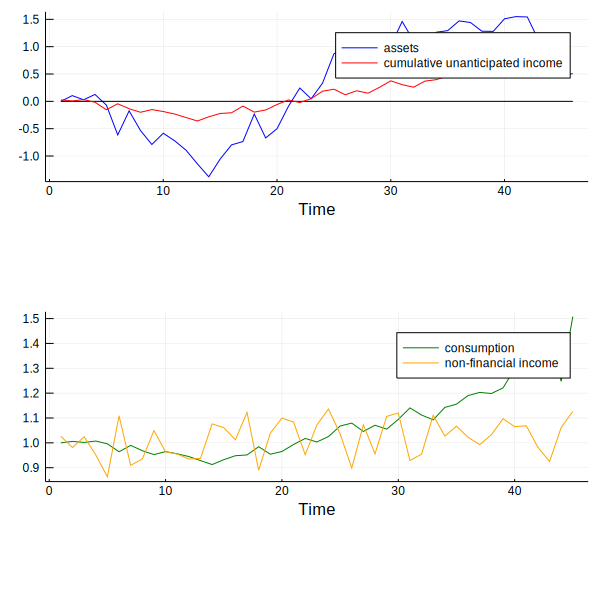

In [3]:
# parâmetros do modelo
r = 0.05
β = 1 / (1 + r)
T = 45
c̄ = 2.0
σ = 0.25
μ = 1.0
q = 1e6

# formular como um problema QL
Q = 1.0
R = zeros(2, 2)
Rf = zeros(2, 2); Rf[1, 1] = q
A = [1 + r -c̄ + μ; 0  1]
B = [-1.0, 0]
C = [σ, 0]

# computar as soluções e simular
lq = QuantEcon.LQ(Q, R, A, B, C; bet = β, capT = T, rf = Rf)
x0 = [0.0, 1]
xp, up, wp = compute_sequence(lq, x0)

# converter de volta os ativos, o consumo e a renda
assets = vec(xp[1, :]) # a_t
c = vec(up .+ c̄) # c_t
income = vec(σ * wp[1, 2:end] .+ μ) # y_t

# plotar os resultados
p = plot([assets, c, zeros(T + 1), income, cumsum(income .- μ)],
         lab = ["assets" "consumption" "" "non-financial income" "cumulative unanticipated income"],
         color = [:blue :green :black :orange :red],
         xaxis = "Time", layout = (2, 1),
         bottom_margin = 20mm, size = (600, 600))

O painel superior mostra a trajetória temporal do consumo $ c_t $ e da renda $ y_t $ na simulação.

Conforme antecipado pela discussão sobre suavização do consumo, o caminho temporal do consumo é muito mais suave que o da renda.

(observe que o consumo se torna mais irregular no final da vida útil, quando o requisito zero de ativo final afeta mais as escolhas de consumo).

O segundo painel da figura mostra que o caminho do tempo dos ativos $ a_t $ é
estritamente correlacionada com a receita imprevista cumulativa, onde esta é definida como:
$$
z_t := \sum_{j=0}^t \sigma w_t
$$

Uma mensagem importante é que ganhos inesperados inesperados são salvos consumidos, enquanto choques negativos imprevistos são atendidos pela redução de ativos.

(Mais uma vez, esse relacionamento é interrompido no final da vida útil devido ao requisito zero de ativo final).

Esses resultados são relativamente robustos às alterações nos parâmetros.

Por exemplo, vamos aumentar $ \beta $ de $ 1 / (1 + r) \approx 0,952 $ para $ 0,96 $, mantendo outros parâmetros corrigidos.

Esse consumidor é um pouco mais paciente que o último e, portanto, coloca relativamente mais peso em valores de consumo posteriores.

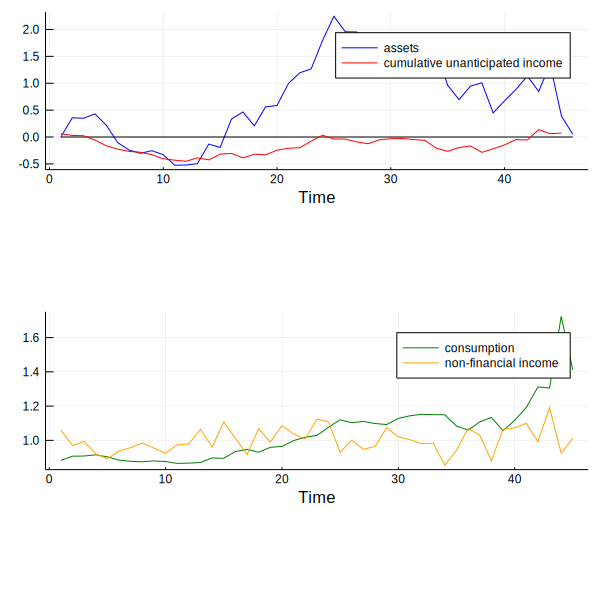

In [4]:
# computar soluções e simular
lq = QuantEcon.LQ(Q, R, A, B, C; bet = 0.96, capT = T, rf = Rf)
x0 = [0.0, 1]
xp, up, wp = compute_sequence(lq, x0)

# converter de volta em ativos, consumo e renda
assets = vec(xp[1, :]) # a_t
c = vec(up .+ c̄) # c_t
income = vec(σ * wp[1, 2:end] .+ μ) # y_t

# plotar resultados
p = plot([assets, c, zeros(T + 1), income, cumsum(income .- μ)],
         lab = ["assets" "consumption" "" "non-financial income" "cumulative unanticipated income"],
         color = [:blue :green :black :orange :red],
         xaxis = "Time", layout = (2, 1),
         bottom_margin = 20mm, size = (600, 600))

Agora temos um fluxo de consumo que cresce lentamente e uma construção em forma de corcunda nos períodos intermediários para financiar o aumento do consumo.

No entanto, as características essenciais são as mesmas: o consumo é suave em relação à renda e os ativos estão fortemente correlacionados positivamente com a renda imprevista cumulativa.

## Extensões e Comentários

Vamos agora considerar um número de extensões-padrão para o problema QL tratado acima.

### Parâmetros de variação temporal

Em algumas configurações, pode ser desejável permitir que $ A, B, C, R $ e $ Q $ dependam de $ t $.

Por uma questão de simplicidade, optamos por não tratar esta extensão em nossa implementação fornecida abaixo.

No entanto, a perda de generalidade não é tão grande quanto você imagina.

De fato, podemos enfrentar muitos modelos com parâmetros variáveis no tempo, escolhendo adequadamente as variáveis de estado.

Uma ilustração é fornecida [abaixo](#lq-nsi).

Para mais exemplos e um tratamento mais sistemático, consulte [[HS13]](https://julia.quantecon.org/../zreferences.html#hansensargent2013), seção 2.4.


<a id='lq-cpt'></a>

### Adicionando um termo de produto cruzado

Em alguns problemas QL, as preferências incluem um termo de produto cruzado $ u_t 'N x_t $, para que a função objetivo se torne:


<a id='equation-lq-object-cp'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{T-1} \beta^t (x_t' R x_t + u_t' Q u_t + 2 u_t' N x_t) + \beta^T x_T' R_f x_T
\right\} \tag{17}
$$

Nossos resultados se estendem a este caso de maneira direta.

A sequência $ \{P_t\} $ de [(12)](#equation-lq-pr) se torna:


<a id='equation-lq-pr-cp'></a>
$$
P_{t-1}
= R - (\beta B' P_t A + N)' (Q + \beta B' P_t B)^{-1} (\beta B' P_t A + N) +
\beta A' P_t A
\quad \text{com } \quad
P_T = R_f \tag{18}
$$

As políticas em [(14)](#equation-lq-oc) são modificadas para:


<a id='equation-lq-oc-cp'></a>
$$
u_t  = - F_t x_t
\quad \text{onde} \quad
F_t := (Q + \beta B' P_{t+1} B)^{-1} (\beta B' P_{t+1} A + N) \tag{19}
$$

A sequência $ \{d_t\} $ é inalterada de [(13)](#equation-lq-dd).

Nós deixamos para os leitores interessados confirmarem esses resutados (os cálculos são longos, porém não tão difíceis).


<a id='lq-ih'></a>

### Horizontes Infinitos


<a id='index-2'></a>
Finalmente, nós consideramos o caso de horizontes infinitos, com [termo de produto cruzado](#lq-cpt), dinâmica inalterada e função objetivo dada por:


<a id='equation-lq-object-ih'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{\infty} \beta^t (x_t' R x_t + u_t' Q u_t + 2 u_t' N x_t)
\right\} \tag{20}
$$

No caso do horizonte infinito, políticas ótimas podem depender do tempo
somente se o próprio tempo for um componente do vetor de estado $ x_t $.

Em outras palavras, existe uma matriz fixa $ F $ tal que $ u_t = -
F x_t $ para todos os $ t $.

Que as regras de decisão são constantes ao longo do tempo é intuitivo - afinal, o tomador de decisão enfrenta o
mesmo horizonte infinito em todas as etapas, com apenas o estado atual mudando.

Não é de surpreender que $ P $ e $ d $ também sejam constantes.

A matriz estacionária $ P $ é a solução para a [equação algébrica de Riccati no tempo discreto](https://en.wikipedia.org/wiki/Algebraic_Riccati_equation).


<a id='riccati-equation'></a>

<a id='equation-lq-pr-ih'></a>
$$
P = R - (\beta B' P A + N)' (Q + \beta B' P B)^{-1} (\beta B' P A + N) +
\beta A' P A \tag{21}
$$

A equação [(21)](#equation-lq-pr-ih) também é chamada de equação *LQ Bellman* e o mapa que envia um determinado $ P $ para o lado direito de [(21)](#equation-lq-pr-ih) é chamado de operador *LQ Bellman*.

A política ótima estacionária para esse modelo é:


<a id='equation-lq-oc-ih'></a>
$$
u  = - F x
\quad \text{onde} \quad
F = (Q + \beta B' P B)^{-1} (\beta B' P A + N) \tag{22}
$$

A sequência $ \{d_t\} $ de [(13)](#equation-lq-dd) é substituída pelo valor constante.


<a id='equation-lq-dd-ih'></a>
$$
d
:= \mathop{\mathrm{traço}}(C' P C) \frac{\beta}{1 - \beta} \tag{23}
$$

O estado evolui de acordo com o processo homogêneo do tempo $ x_{t+1} = (A - BF) x_t + C w_{t+1} $.

Um exemplo de problema de horizonte infinito é tratado [abaixo](#lqc-mwac).


<a id='lq-cert-eq'></a>

### Equivalência de certeza

Os problemas de controle quadrático linear da classe discutida acima têm a propriedade de *equivalência de certeza*.

Com isso, queremos dizer que a política ideal $ F $ não é afetada pelos parâmetros em $ C $, que especificam o processo de choque.

Isso pode ser confirmado inspecionando [(22)](#equation-lq-oc-ih) ou [(19)](#equation-lq-oc-cp).

Conclui-se que podemos ignorar a incerteza ao resolver o comportamento ideal e conectá-lo novamente ao examinar a dinâmica de estado ideal.

## Outras Aplicações


<a id='lq-nsi'></a>

### Aplicação 1: processo de renda dependente da idade

[Anteriormente](#lq-mfpa) estudamos um modelo de renda permanente que gerava suavização de consumo.

Uma característica irrealista desse modelo é a suposição de que a média do processo de renda aleatória não depende da idade do consumidor.

Um perfil de renda mais realista é aquele que aumenta no início da vida profissional, atinge o pico no meio e talvez diminua no final da vida profissional e cai mais durante a aposentadoria.

Nesta seção, modelaremos essa ascensão e queda como um “U” invertido simétrico usando um polinômio na idade.

Como antes, o consumidor procura minimizar:


<a id='equation-lq-pip'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{T-1} \beta^t (c_t - \bar c)^2 + \beta^T q a_T^2
\right\} \tag{24}
$$

susjeito à $ a_{t+1} = (1 + r) a_t - c_t + y_t, \ t \geq 0 $.

Para a renda, agora tomamos $ y_t = p(t) + \sigma w_{t+1} $ onde $ p(t) := m_0 + m_1 t + m_2 t^2 $.

(na [próxima seção](#lq-nsi2) nós empregamos alguns truques para implementar um modelo mais sofisticado).

Os coeficientes $ m_0, m_1, m_2 $ são escolhidos tais que $ p(0)=0, p(T/2) = \mu, $ e $ p(T)=0 $.

Você pode confirmar que a especificação $ m_0 = 0, m_1 = T \mu /(T/2)^2, m_2 = - \mu /(T/2)^2 $ satisfaz essas restrições.

Para colocar isso em uma configuração de QL, considere a restrição de orçamento, que se torna:

<a id='equation-lq-hib'></a>
$$
a_{t+1} = (1 + r) a_t - u_t - \bar c + m_1 t + m_2 t^2 + \sigma w_{t+1} \tag{25}
$$

O fato de que $ a_{t + 1} $ é uma função linear de $ (a_t, 1, t, t ^ 2) $ sugere considerar essas quatro variáveis como o vetor de estado $ x_t $.

Uma vez que uma boa escolha de estado e controle (lembre-se de $ u_t = c_t - \bar c $) foi feita, as demais especificações se encaixam com relativa facilidade.

Assim, para a dinâmica que estabelecemos:


<a id='equation-lq-lowmc3'></a>
$$
x_t :=
\left(
\begin{array}{c}
a_t \\
1 \\
t \\
t^2
\end{array}
\right),
\quad
A :=
\left(
\begin{array}{cccc}
1 + r & -\bar c & m_1 & m_2 \\
0     & 1       & 0   & 0   \\
0     & 1       & 1   & 0   \\
0     & 1       & 2   & 1   \\
\end{array}
\right),
\quad
B :=
\left(
\begin{array}{c}
-1 \\
0 \\
0 \\
0
\end{array}
\right),
\quad
C :=
\left(
\begin{array}{c}
\sigma \\
0 \\
0 \\
0
\end{array}
\right) \tag{26}
$$

Se você expandir a expressão $ x_{t + 1} = A x_t + B u_t + C w_{t + 1} $ usando esta especificação, você descobrirá que os ativos seguem [(25)](#equation-lq-hib) conforme desejado, e que as outras variáveis de estado também atualizem adequadamente.

Para implementar a especificação de preferência [(24)](#equation-lq-pip), tomamos:


<a id='equation-lq-4sp'></a>
$$
Q := 1,
\quad
R :=
\left(
\begin{array}{cccc}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}
\right)
\quad \text{e} \quad
R_f :=
\left(
\begin{array}{cccc}
q & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}
\right) \tag{27}
$$

A próxima figura mostra uma simulação de consumo e ativos calculados usando o método `compute_sequence` do` lqcontrol.jl` com os ativos iniciais definidos como zero.

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/0c794bc8-4c8b-4ce5-8093-27e2aa731530)

  
Mais uma vez, o consumo suave é uma característica dominante dos caminhos da amostra.

O caminho do ativo exibe dinâmica consistente com a teoria do ciclo de vida padrão.

O Exercício 1 fornece o conjunto completo de parâmetros usados aqui e solicita que você replique a figura.


<a id='lq-nsi2'></a>

### Aplicação 2: Um modelo de renda permanente com aposentadoria

Na [aplicação anterior](#lq-nsi), geramos dinâmica de renda com forma de U invertida usando polinômios e as colocamos em uma estrutura de QL.

É possível que esse processo de renda ainda contenha características irreais.

Um perfil de ganhos mais comum é onde:

1. A renda cresce ao longo da vida profissional, flutuando em torno de uma tendência crescente, com o crescimento se achatando nos anos posteriores, e
2. A aposentadoria se segue, com renda (não financeira) mais baixa, mas relativamente estável.


Como $ K $ é a data da aposentadoria, podemos expressar essa dinâmica de renda
de:


<a id='equation-lq-cases'></a>
$$
y_t =
\begin{cases}
p(t) + \sigma w_{t+1} & \quad \text{se } t \leq K  \\
s                     & \quad \text{caso contrário }  \\
\end{cases} \tag{28}
$$

Aqui:

- $ p(t) := m_1 t + m_2 t^2 $ com os coeficientes $ m_1, m_2 $ escolhidos tais que $ p(K) = \mu $ e $ p(0) = p(2K)=0 $;  
- $ s $ é a renda da aposentadoria.


Supomos que as preferências sejam inalteradas e dadas por [(16)](#equation-lq-pio).

A restrição de orçamento também é inalterada e é fornecida por $ a_{t + 1} = (1 + r) a_t - c_t + y_t $.

Nosso objetivo é resolver esse problema e simular caminhos usando as técnicas de LQ descritas nesta palestra.

De fato, este é um problema não trivial, pois a torção na dinâmica [(28)](#equation-lq-casos) em $ K $ torna muito difícil expressar a lei do movimento como um sistema linear de coeficiente fixo.

No entanto, ainda podemos usar nossos métodos QL aqui, vinculando adequadamente dois problemas QL de componentes.

Esses dois problemas QL descrevem o comportamento do consumidor durante sua vida profissional (`lq_working`) e aposentadoria (` lq_retired`).

(Isso é possível porque nos dois períodos separados da vida, os respectivos processos de renda
[tendência polinomial e constante] cada uma se encaixa na estrutura QL)

A idéia básica é que, embora todo o problema não seja um único problema QL invariável, é
ainda é um problema de programação dinâmica e, portanto, podemos usar equações de Bellman apropriadas em
todas as etapas.

Com base nessa lógica, podemos:

1. Resolver `lq_retired` pelo procedimento usual de indução reversa, retornando ao início da aposentadoria;
2. Pegar a função de valor de início de aposentadoria gerada por esse processo e usar como condição terminal $ R_f $ para alimentar a especificação `lq_working`, e
3. Resolver o `lq_working` induzindo de trás para frente a partir desta opção de $ R_f $, retornando ao início da vida profissional.


Esse processo fornece toda a sequência vitalícia de funções de valor e políticas ideais.

A próxima figura mostra uma simulação com base neste procedimento.

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/9d70b9a1-c4df-48e1-a7c1-fc4ac0b5af7c)  
O conjunto completo de parâmetros usados na simulação é discutido no [Exercício 2](#lqc-ex2), no qual você é solicitado a replicar a figura.

Mais uma vez, a característica dominante observável na simulação é o consumo
alisamento.

O caminho do ativo se encaixa bem com a teoria padrão do ciclo de vida, com a rejeição precoce
na vida, seguido de poupança posterior.

Os ativos atingem o pico na aposentadoria e diminuem posteriormente.


<a id='lqc-mwac'></a>

### Aplicação 3: Monopólio com custos de ajuste

Considere um monopolista perante uma função demana inversa e estocástica:

$$
p_t = a_0 - a_1 q_t + d_t
$$

Aqui $ q_t $ é a resposta, e o choque de demanda $ d_t $ segue

$$
d_{t+1} = \rho d_t + \sigma w_{t+1}
$$

onde $ \{w_t\} $ é iid e normal padronizada.

O monopolista maximiza a soma descontada esperada dos lucros presentes e futuros:


<a id='equation-lq-object-mp'></a>
$$
\mathbb E \,
\left\{
    \sum_{t=0}^{\infty} \beta^t
    \pi_t
\right\}
\quad \text{onde} \quad
\pi_t := p_t q_t - c q_t - \gamma (q_{t+1} - q_t)^2 \tag{29}
$$

Aqui:

- $ \gamma (q_ {t + 1} - q_t) ^ 2 $ representa custos de ajuste, e
- $ c $ é o custo médio de produção.


Isso pode ser formulado como um problema QL e, em seguida, resolvido e simulado, mas primeiro vamos estudar o problema e tentar obter alguma intuição.

Uma maneira de começar a pensar sobre o problema é considerar o que aconteceria se $ \gamma = 0 $.

Sem custos de ajuste, não há trade-off intertemporal; portanto, o monopolista escolherá a produção para maximizar o lucro atual em cada período.

Não é difícil mostrar que a produção maximizadora de lucro é:

$$
\bar q_t := \frac{a_0 - c + d_t}{2 a_1}
$$

À luz dessa discussão, o que podemos esperar para $ \gamma $ geral é que:

- Se $ \gamma $ estiver próximo de zero, então $ q_t $ rastreará o caminho de $ \bar q_t $ relativamente próximo.
- Se $ \gamma $ for maior, então $ q_t $ será mais suave que $ \bar q_t $, pois o monopolista procura evitar custos de ajuste.


Essa intuição acaba sendo correta.

As figuras a seguir mostram simulações produzidas resolvendo o problema correspondente QL.

A única diferença nos parâmetros entre as figuras é o tamanho de $ \gamma $.

![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/1cc50d17-1f65-4db0-9419-2ad4a71c8a7e)



![4](https://github.com/pluiz30/Julia-Hub/assets/60633407/b77bda8a-f9e1-4ab8-9962-6464a04dbf5d)

![5](https://github.com/pluiz30/Julia-Hub/assets/60633407/f3bd744f-3005-4e60-86c3-8d4c68dae649)
Para produzir esses números, convertemos o problema monopolista em um problema QL.

A chave para essa conversão é escolher o estado certo - o que pode ser um pouco complicado.

Aqui tomamos $ x_t = (\bar q_t \; \, q_t \; \, 1) '$, enquanto o controle é escolhido como $ u_t = q_{t + 1} - q_t $.

Também manipulamos um pouco a função de lucro.

Em [(29)](#equation-lq-object-mp), os lucros atuais são $ \pi_t: = p_t q_t - c q_t - \gamma (q_{t + 1} - q_t) ^ 2 $.

Vamos agora substituir $ \pi_t $ em [(29)](#equation-lq-object-mp) por $ \hat \pi_t: = \pi_t - a_1 \bar q_t ^ 2 $.

Isso não faz diferença para a solução, pois $ a_1 \bar q_t ^ 2 $ não depende dos controles.

(de fato, estamos apenas adicionando um termo constante a [(29)](#equation-lq-object-mp) e os otimizadores não são afetados por termos constantes)

A razão para fazer essa substituição é que, como você poderá verificar, $ \hat \pi_t $ reduz para o quadrático simples

$$
\hat \pi_t = -a_1 (q_t - \bar q_t)^2 - \gamma u_t^2
$$

Após a negação para converter em um problema de minimização, o objetivo se torna:


<a id='equation-lq-object-mp2'></a>
$$
\min
\mathbb E \,
    \sum_{t=0}^{\infty} \beta^t
\left\{
    a_1 ( q_t - \bar q_t)^2 + \gamma u_t^2
\right\} \tag{30}
$$

Agora é relativamente simples encontrar $ R $ e $ Q $ de modo que [(30)](#equation-lq-object-mp2) pode ser escrito como [(20)](#equation-lq-object-ih).

Além disso, as matrizes $ A, B $ e $ C $ de [(1)](#equation-lq-lom) pode ser encontrado anotando a dinâmica de cada elemento do estado.

[O exercício 3](#lqc-ex3) solicita que você conclua esse processo e reproduza as figuras anteriores.

## Exercícios


<a id='lqc-ex1'></a>

### Exercício 1

Replique a figura com a renda polinomial [mostrada acima](#solution-lqc-ex1-fig).

Os parâmetros são $ r = 0.05, \beta = 1 / (1 + r), \bar c = 1.5,  \mu = 2, \sigma = 0.15, T = 50 $ e $ q = 10^4 $.


<a id='lqc-ex2'></a>

### Exercício 2

Replicar a figura sobre trabalho e aposentadoria [mostrada acima](#solution-lqc-ex2-fig).

Os parâmetros são $ r = 0,05, \beta = 1 / (1 + r), \bar c = 4, \mu = 4, \sigma = 0,35, K = 40, T = 60, s = 1 $ e $ q = 10 ^ 4 $.

Para entender o procedimento geral, leia atentamente a seção que contém essa figura.

Algumas dicas são as seguintes:

Primeiro, para fazer nossa abordagem funcionar, precisamos garantir que os dois problemas QL tenham as mesmas variáveis e controle de estado.

Como nos aplicativos anteriores, o controle pode ser definido como $ u_t = c_t - \bar c $.

Para `lq_working`, $ x_t, A, B, C $ podem ser escolhidos como em [(26)](#equation-lq-lowmc3).

- Lembre-se de que $ m_1, m_2 $ são escolhidos para que $ p (K) = \mu $ e $ p (2K) = 0 $.


Para `lq_retired`, use a mesma definição de $ x_t $ e $ u_t $, mas modifique $ A, B, C $ para corresponder à renda constante $ y_t = s $.

Para `lq_retired`, defina as preferências como em [(27)](#equation-lq-4sp).

Para `lq_working`, as preferências são as mesmas, exceto que $ R_f $ deve ser substituído pela função de valor final que emerge da iteração `lq_retired` de volta ao início da aposentadoria.

Com alguns cuidados cuidadosos, a simulação pode ser gerada através de aplicação de remendos juntos as simulações desses dois modelos separados.


<a id='lqc-ex3'></a>

### Exercício 3

Reproduza as figuras do aplicativo monopolista fornecido acima.

Para parâmetros, use $ a_0 = 5, a_1 = 0,5, \sigma = 0,15, \rho = 0,9,
\beta = 0,95 $ e $ c = 2 $, enquanto $ \gamma $ varia entre 1 e 50
(veja as figuras).

## Soluções

### Exercício 1

Aqui está uma solução.

Usamos alguns comandos sofisticados de plotagem para obter um certo estilo - fique à vontade para
use os mais simples.

O modelo é um modelo de renda/ciclo de vida permanente QL com forma de corcunda
renda.

$$
y_t = m_1 t + m_2 t^2 + \sigma w_{t+1}
$$

onde $ \{w_t\} $ é iid $ N(0, 1) $ e os coeficientes $ m_1 $ e $ m_2 $ são escolhidos para que $ p(t) = m_1 t + m_2 t^2 $ tenha uma forma de U invertido com:

- $ p(0) = 0, p(T/2) = \mu $, e  
- $ p(T) = 0 $.  

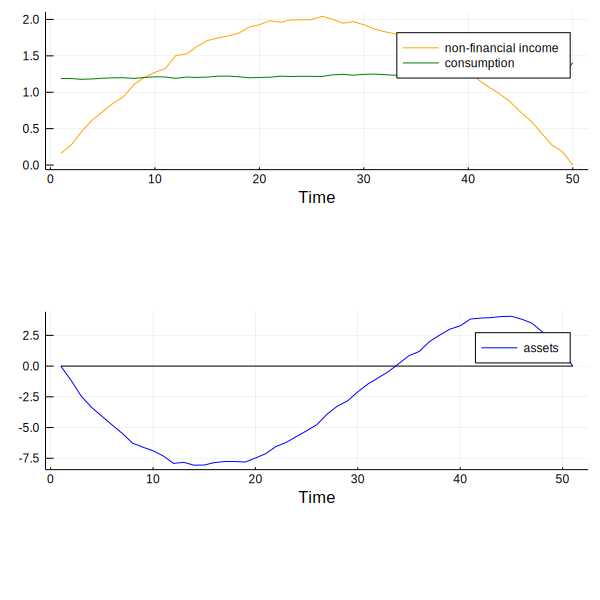

In [5]:
# parâmetros do modelo
r = 0.05
β = 1 / (1 + r)
T = 50
c̄ = 1.5
σ = 0.15
μ = 2
q = 1e4
m1 = T * (μ / (T / 2)^2)
m2 = -(μ / (T / 2)^2)

# formular como um problem QL
Q = 1.0
R = zeros(4, 4)
Rf = zeros(4, 4); Rf[1, 1] = q
A = [1 + r -c̄ m1 m2;
     0     1      0  0;
     0     1      1  0;
     0     1      2  1]
B = [-1.0, 0.0, 0.0, 0.0]
C = [σ, 0.0, 0.0, 0.0]

# computar as soluções e simular
lq = QuantEcon.LQ(Q, R, A, B, C; bet = β, capT = T, rf = Rf)
x0 = [0.0, 1, 0, 0]
xp, up, wp = compute_sequence(lq, x0)

# converter os resultados de volta em consumo, ativos e renda
ap = vec(xp[1, 1:end]) # assets
c = vec(up .+ c̄) # consumption
time = 1:T
income = σ * vec(wp[1, 2:end]) + m1 * time + m2 * time.^2 # income

# plotar os resultados
p1 = plot(Vector[income, ap, c, zeros(T + 1)],
          lab = ["non-financial income" "assets" "consumption" ""],
          color = [:orange :blue :green :black],
          xaxis = "Time", layout = (2,1),
          bottom_margin = 20mm, size = (600, 600))

### Exercício 2

Este é um modelo permanente de renda/ciclo de vida com crescimento polinomial em rendimento ao longo da vida profissional, seguido de um rendimento fixo de reforma. O modelo é resolvido combinando dois problemas de programação QL, conforme descrito na aula.

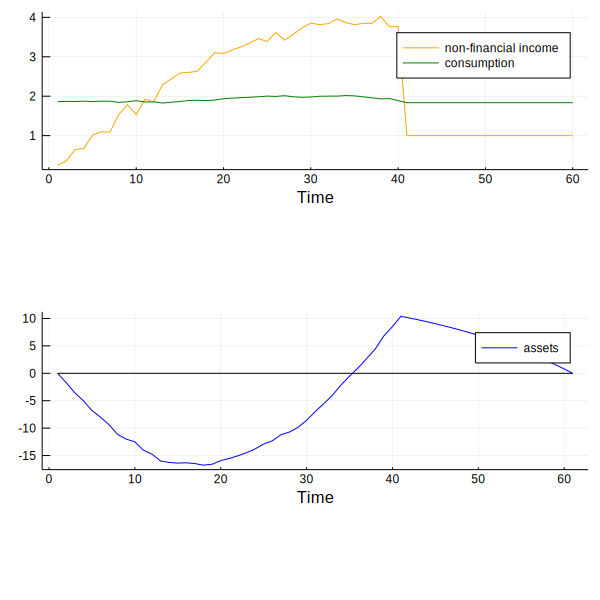

In [6]:
# parâmetros do modelo
r = 0.05
β = 1/(1 + r)
T = 60
K = 40
c̄ = 4
σ = 0.35
μ = 4
q = 1e4
s = 1
m1 = 2 * μ / K
m2 = - μ / K^2

# formular o problema QL 1 (aposentadoria)
Q = 1.0
R = zeros(4, 4)
Rf = zeros(4, 4); Rf[1, 1] = q
A = [1+r  s-c̄ 0 0;
     0     1      0 0;
     0     1      1 0;
     0     1      2 1]
B = [-1.0, 0, 0, 0]
C = zeros(4)

# inicializar a instância QL para o agente aposentado
lq_retired = QuantEcon.LQ(Q, R, A, B, C; bet = β, capT = T - K, rf = Rf)

# Desde que update_values! () mude seu argumento, precisamos de outra instância idêntica
# apenas para obter a função de valor correta
lq_retired_proxy = QuantEcon.LQ(Q, R, A, B, C; bet = β, capT = T - K, rf = Rf)

# iterar de volta ao início da aposentadoria, gravar a função de valor final
for i in 1:(T - K)
    update_values!(lq_retired_proxy)
end
Rf2 = lq_retired_proxy.P

# formular o problema QL 2 (vida útil)
Q = 1.0
R = zeros(4, 4)
A = [1 + r -c̄ m1 m2;
     0     1      0  0;
     0     1      1  0;
     0     1      2  1]
B = [-1.0, 0, 0, 0]
C = [σ, 0, 0, 0]

# configurar a instância QL da vida útil com o terminal Rf de lq_retired
lq_working = QuantEcon.LQ(Q, R, A, B, C; bet = β, capT = K, rf = Rf2)

# simular a vida útil / caminhos de controle
x0 = [0.0, 1, 0, 0]
xp_w, up_w, wp_w = compute_sequence(lq_working, x0)

# simular caminhos de aposentadoria (observe a condição inicial)
xp_r, up_r, wp_r = compute_sequence(lq_retired, xp_w[:, end])

# converter esses resultados de volta em consumo, ativos e renda
xp = [xp_w xp_r[:, 2:end]]
assets = vec(xp[1, :]) # ativos

up = [up_w up_r]
c = vec(up .+ c̄) # consumo

time = 1:K
income_w = σ * vec(wp_w[1, 2:K+1]) + m1 .* time + m2 .* time.^2 # renda
income_r = ones(T - K) * s
income = [income_w; income_r]

# plotar os resultados
p2 = plot([income, assets, c, zeros(T + 1)],
          lab = ["non-financial income" "assets" "consumption" ""],
          color = [:orange :blue :green :black],
          xaxis = "Time", layout = (2, 1),
          bottom_margin = 20mm, size = (600, 600))

### Exercício 3

A primeira tarefa é encontrar as matrizes $ A, B, C, Q, R $ que definem o problema QL.

Lembre-se de que $ x_t = (\bar q_t \; \, q_t \; \, 1) '$, enquanto $ u_t = q_ {t + 1} - q_t $.

Deixando $ m_0: = (a_0 - c) / 2a_1 $ e $ m_1: = 1/2 a_1 $, nós pode escrever $ \bar q_t = m_0 + m_1 d_t $ e, em seguida, com alguma manipulação, obtemos

$$
\bar q_{t+1} = m_0 (1 - \rho) + \rho \bar q_t + m_1 \sigma w_{t+1}
$$

Pela nossa definição de $ u_t $, a dinâmica de $ q_t $ é $ q_ {t + 1} = q_t + u_t $.

Usando esses fatos, você poderá criar as informações corretas para as matrizes $ A, B, C $ (e depois compará-las com as encontradas no código de solução abaixo).

Matrizes $ R, Q $ adequadas podem ser encontradas através da inspeção do objetivo, que repetimos aqui por conveniência:

$$
\min
\mathbb E \,
\left\{
    \sum_{t=0}^{\infty} \beta^t
    a_1 ( q_t - \bar q_t)^2 + \gamma u_t^2
\right\}
$$

Nosso código de solução é:

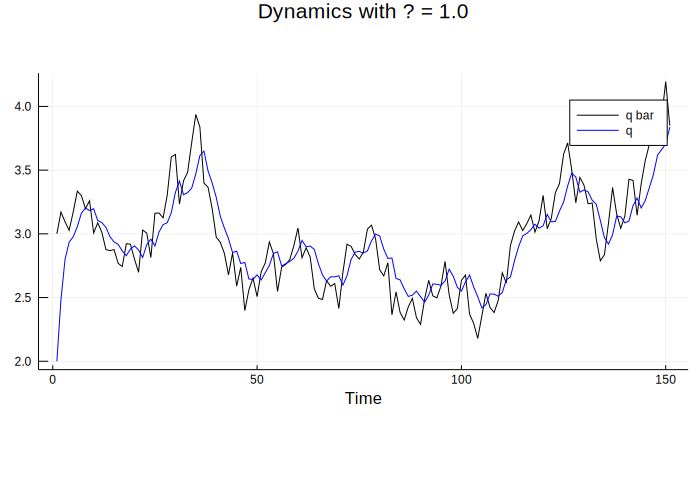

In [7]:
# parâmetros do modelo
a0 = 5.0
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 1.0
β = 0.95
c = 2.0
T = 120

# constantes úteis
m0 = (a0 - c) / (2 * a1)
m1 = 1 / (2 * a1)

# formular o problema QL
Q = γ
R = [a1 -a1 0; -a1 a1 0; 0 0 0]
A = [ρ 0 m0 * (1 - ρ); 0 1 0; 0 0 1]

B = [0.0, 1, 0]
C = [m1 * σ, 0, 0]

lq = QuantEcon.LQ(Q, R, A, B, C; bet = β)

# simular os caminhos de estado e controle
x0 = [m0, 2, 1]
xp, up, wp = compute_sequence(lq, x0, 150)
q̄ = vec(xp[1, :])
q = vec(xp[2, :])

# plotar os resultados da simulação
p3 = plot(eachindex(q), [q̄ q],
          lab = ["q bar" "q"],
          color = [:black :blue],
          xaxis = "Time", title = "Dynamics with γ = $γ",
          bottom_margin = 20mm, top_margin = 10mm,
          size = (700, 500))